# Assignment #3 - Neural Networks

### <font color="red"> DUE: Oct 29 (Tuesday) 11:00 pm </font>  

<font color="blue">Abhilash Mandlekar </font>

# I. Overview

The main objective for this assignment is to learn Neural Networks and implement it on classification and regression data.
The aim is to configure the neural network model to its best, in this assignment we are doing K-fold cross validation which can be used to train the neural network with best parameters.

These best parameters are feed to **Non-linear Regression** and **Non-linear Logistics Regression** neural network models.

The dataset I am using is used previously in assignment 1 for regression. This dataset can be used for classification since it has columns which can be used to predict if there will be rain on next day or not.


# Data

I am using the same dataset for Neural Networks assignment as that used in my last assignment. The dataset is of "Rain in Australia" which is taken from kaggle. The dataset has total 23 features and has over 1 lakh rows which is used to predict the rain in mm. However, for this assignment I have considered only 15000 rows in dataset. 

The feature RISK_MM is the set of continuous values which gives the approximate value of the next day rain (in mm) and is the feature that we can predict using linear regression algorithm. If the value of RISK_MM is high (may be greater than 3 mm) it is said that the chances of rain on the next day is also high. This feature is dependant on many other features such as tempreature, humidity, pressure during the morning (9am) as well as in the afternoon (3pm). It also considers other features such as Sunshine, evaporation, windspeed and wind-direction.

The another important set of feature is ***Rainfall*** and ***RainToday*** which gives information about today's rainfall.

Tempreature is measured in degree centegrate, pressure in hpa, rainfall in mm, humidity is measured in percentage. The windspeed is measured in km per hr. The unit of measurement for clouds is "oktas".

### Reading the data

Since the data is in csv file, I have used pandas function read_csv to read the csv file for the dataset. This creates the dataframe which can directly be treated as the table and maintains the data in structured format. Here I have created a class that can be used to read the dataset for rain.


In [179]:
import numpy as np 
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import re 
import sys

import seaborn as sb

import collections

class ReadWeatherData():
    def weatherData(self, fname):
        df = pd.read_csv(fname)
        df = df.dropna()
        return df

In [180]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")

### Describe the data

In [181]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


In [182]:
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

In [183]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")

In [184]:
#rain_df_x.shape
rain_df_target.shape

(56420, 1)

### Visualization of data

#### 1. Distribution plot (Windspeed distribution)

We can see that the windspeed is normally distributed between the range of 0-120 km/hr. As we can see from the graph below, the mean of windspeed in this dataset is around 38 km/hr.

Dataframe is matrix of:  (56420, 23)


Text(0.5, 0, 'Wind speed in km/hr')

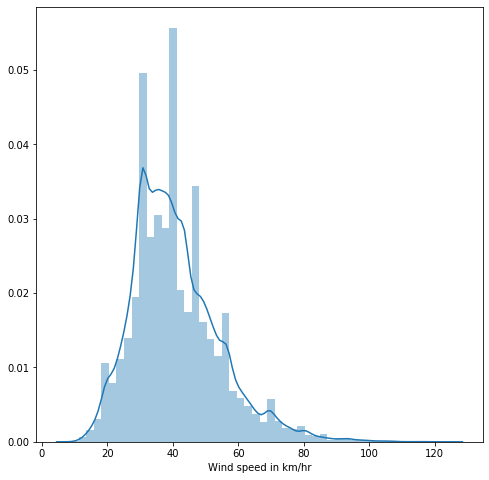

In [185]:
print("Dataframe is matrix of: ",rain_df.shape)
fig, ax = plt.subplots(figsize=(8,8))
sb.distplot(rain_df['WindGustSpeed'])
plt.xlabel("Wind speed in km/hr")

#### 2. Scatter plot ( Humidity % vs Rainfall in mm)

As the humidity percentage in air increases, it increases the rainfall. The same is shown in the scatter plot below.

We can clearly see that there are more datapoints plotted when the humidity in air is higher.

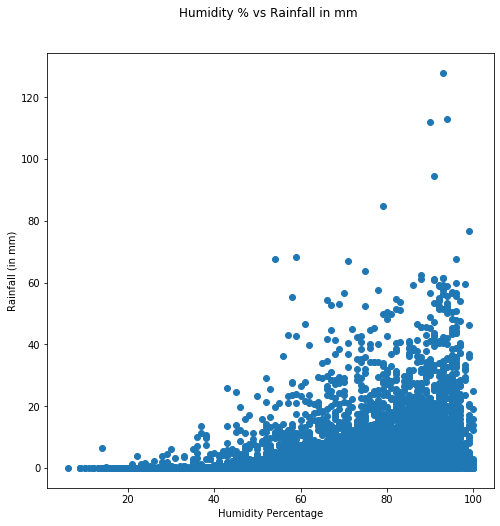

In [186]:
rain_df = rain_df[:15000]
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(rain_df['Humidity9am'], rain_df['Rainfall'])
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Humidity Percentage")
plt.title("Humidity % vs Rainfall in mm \n\n")
plt.show()

#### 3. Bar graph (Cities in Australia vs Rainfall in mm)

The bar graph below, shows the cities with the respective rainfall in mm.

The highest rainfall is recorded in city "CoffsHarbour" with more than 120 mm rainfall followed by city "More" having 110 mm of rainfall.

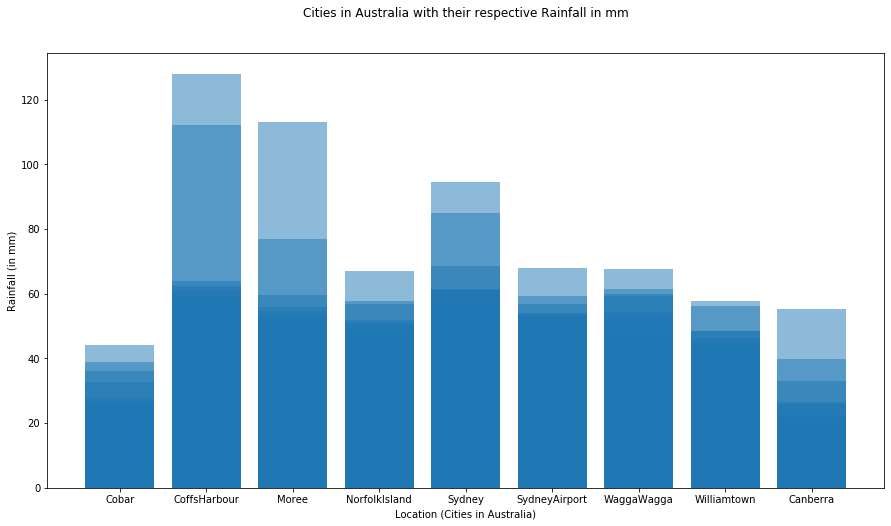

In [187]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(rain_df['Location'], rain_df['Rainfall'], alpha=0.5)
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Location (Cities in Australia)")
plt.title("Cities in Australia with their respective Rainfall in mm\n\n")
plt.show()

### Preliminary Observation

By looking at the above graphs we can make some general observations such as,<br>
1) the increase in humidity percentage in atmosphere increase the rainfall in mm (scatter plot 2)<br>
2) Rainfall Trends in Australia - we can clearly see the regions that has higher rainfall than in other regions. (Bar graph 3)<br>
3) The first distribution graph shows the wind speed in most of the dataset is near to 40 km/hr<br>

### Data Preprocessing

In this dataset, first I have directly droped the null values since I have lot many rows in the dataset. For LMS implementation I have normalized the data and scaled every feature between 0-1.

In [188]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")
rain_df = rain_df.dropna()
df1 = rain_df.iloc[:,2:7]
df2 = rain_df.iloc[:,8]
df3 = rain_df.iloc[:,11:21]
df1 = df1.join(df2)
df1 = df1.join(df3)
rain_df_x = df1
#print(rain_df.head())
rain_df_target = rain_df.iloc[:,22:23]
rain_df = rain_df_x.join(rain_df_target)

#########################################################################
#print(rain_df.iloc[:5,0:16])
rain_df_x = rain_df.iloc[:,0:16]
rain_df_target = rain_df.iloc[:,16:17]

# III. Methods

## III.A Summary of Cross-validation 

The aim is to select the model which very well generalizes with the data. The idea is preparing one dataset (a validation set) by pretending that we cannot see the labels. After choosing a model parameter (or a model) and train it with training dataset, we test it on the validation data. Comparing the validation error, we select the one that has the lowest validation error. Finally, we evaluate the model on testing data.

Here we are implementing 5-fold cross validation. The data gets divided into 5 parts. Amongst these 5 parts, each time, the data is trained on 4 parts and is tested on the other remaining part. In this way we get the 5 parameters with different values to configure the model (values such as number of layers to use, and their accuracies). The model with high accuracy can be used to train the neural network on the data.

In [189]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nn import NeuralNet
from grad import scg
from util import Standardizer

In [190]:

#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split_rain_df(rain_df):
    part = len(rain_df) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(rain_df):
        mylist.append(rain_df[int(x):int(x + part)])
        x += part
    return mylist

best_list=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split_rain_df(X)
    T_partitioned = split_rain_df(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_list.append(best_param)

    return final_list,best_list

## Explanation of code

The method to follow the cross validation is given in lecture notes: 

    For each TEST partition

        For each validation partition among the rest partitions

            Choose the rest partitions into a training set.

            For each set P of parameters to test

                Using P, train the model

                Use the trained model on the validation data

                Evaluate the validation result and store the restuls to res

        From the res result, pick the one with the best result.

        Retrain the model with the best parameter p in P.

        Apply the model with the best parameter p* to the test dataset.

        Evaluate the result err and store the tuple (p*, err) to testErrs.

    Return testErrs.

Following the above procedure in the above code:<br>

The split function splits the data into 5 equal size datasets. Each of this division is 20% of all the data. Each partition is also called as test partition. <br> 

Now one validation partition is choosen among the rest partitions, the training is given on all the other datasets. For each set of parameters in these partition, the model is trainined. The rmse error is calculated on a validation set (The one partition amongst the 5 different partitions). <br>

The list is maintained which keeps the history of rmse error. This list is used to further calculate the best model.
The function returns the list of rmse errors with model corresponding to it in another list.

## Presentation of Cross Validation result - Non-linear regression

In [191]:
models = [[16,3,1],[16,5,1],[16,7,1], [16,10,1], [16,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(rain_df_x), np.array(rain_df_target), models)

Test number:  0
K is :  0
K is :  1


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[5.49178707121579, 5.614330407469755, 6.053591765754907, 6.229980182171506, 6.1377950548110745]
5.49178707121579
[16, 3, 1]
K is :  2


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.87095697403254, 8.655161975627486, 8.664166525909007, 9.000938937501962, 8.787867795911469]
8.655161975627486
[16, 5, 1]
K is :  3


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.505839919740284, 7.603852591620542, 7.74004659966559, 8.263016773074472, 7.661583913238005]
7.505839919740284
[16, 3, 1]
K is :  4


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.45743711478129, 8.120072606792188, 8.184254239508128, 8.437498265463262, 8.181486462379114]
8.120072606792188
[16, 5, 1]
[16, 3, 1]


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  1
K is :  0


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.344800464567821, 7.195809331847979, 7.04729288442825, 6.956877254657025, 6.869047662098219]
6.869047662098219
[16, 12, 1]
K is :  1
K is :  2


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.478763051781776, 8.632656516476754, 9.138030038448811, 8.727734901519012, 9.002450152238115]
8.478763051781776
[16, 3, 1]
K is :  3


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.523151564193456, 8.204568518545367, 7.6146602031900095, 7.892192558158152, 7.845306148828959]
7.523151564193456
[16, 3, 1]
K is :  4


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.047474071891461, 8.271292771939828, 8.32466457595207, 8.354789796416902, 8.487857182832753]
8.047474071891461
[16, 3, 1]
[16, 3, 1]


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  2
K is :  0


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.365722169296661, 7.196345016236465, 6.933648807388031, 6.8242999298961164, 6.780349494439551]
6.780349494439551
[16, 12, 1]
K is :  1


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[5.4542158979887105, 5.6602284554113504, 6.675432375248919, 6.350052987024434, 6.127827361500215]
5.4542158979887105
[16, 3, 1]
K is :  2
K is :  3


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.4778528234129595, 7.70401157081465, 7.664181748866861, 8.102373219455309, 7.986916127713757]
7.4778528234129595
[16, 3, 1]
K is :  4


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.043896637836042, 8.14358603330054, 8.255133663343452, 8.208477036816817, 8.181597442165687]
8.043896637836042
[16, 3, 1]
[16, 5, 1]


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  3
K is :  0


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.3396368708957045, 7.192987033696148, 7.053880282708795, 6.928482274058995, 6.847237052420876]
6.847237052420876
[16, 12, 1]
K is :  1


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[5.475681984608154, 6.360119056756666, 5.913231154332101, 6.2437907183997385, 6.075115917156123]
5.475681984608154
[16, 3, 1]
K is :  2


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.54957614556169, 8.44194504871122, 8.697872672939225, 9.07386247882963, 8.813489984030069]
8.44194504871122
[16, 5, 1]
K is :  3
K is :  4


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.010159780758318, 8.144006570202444, 8.221869015124327, 8.253293596327437, 8.763770234985929]
8.010159780758318
[16, 3, 1]
[16, 5, 1]


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  4
K is :  0


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.246619509908973, 7.067701048984285, 7.067878682992474, 6.76548822092375, 6.709737588258164]
6.709737588258164
[16, 12, 1]
K is :  1


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[5.514156853360518, 5.692770783539199, 6.009436561781955, 6.916620985436146, 6.69720865192809]
5.514156853360518
[16, 3, 1]
K is :  2


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[8.437068908207861, 8.780589250637368, 8.775852379091843, 8.97879842692465, 9.067913124422356]
8.437068908207861
[16, 3, 1]
K is :  3


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for n

[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
[7.452212827229121, 7.565328295780967, 8.263401895822977, 7.756251183248353, 7.6569620122427935]
7.452212827229121
[16, 3, 1]
K is :  4
[16, 5, 1]


C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [192]:
print(bestAccuracy,bestParam)

[13.664413536591184, 5.5100450561972645, 9.888385723815833, 7.591929121784903, 9.821986704128587] [[16, 3, 1], [16, 3, 1], [16, 5, 1], [16, 5, 1], [16, 5, 1]]


In [193]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(rain_df_x),np.array(rain_df_target),test_size=0.30,random_state=40)

## III.B Summary of Nonlinear Regression
A Neural Network has got non linear activation layers which is what gives the Neural Network a non linear element.

In linear regression, we assume the first column of  𝐗1  is the bias column with 1's. Thus, the weight matrix  𝐖  is  (𝐷+1)×𝐾  with the bias row in the first row.

From this model, we can convert the raw data  𝐗  to  𝚽 , which is a nonlinear mapping.

The hidden layers in neural network acts as activation layers for the next layer. The objective is to make sum of squares as small as possible.

We can rewrite the linear model with as follows:

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 
\\
Y &= \Phi W \\ 
\\
Y_{nk} &= \Phi_n^\top W_k 
\end{align}
$$

Now, let $\phi(xv) = h(xv)$ where $h$ is the *activation function*.  

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W
\end{align}
$$

In [194]:
model=NeuralNet([16,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

C:\Users\LENOVO\Notebook\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


{'w': array([-2.86574197e+00, -1.95287899e+00,  1.03304292e+01,  4.15473844e-01,
         1.69468286e-01, -4.08179108e-01, -4.08397157e-01, -3.98600617e-02,
         1.66582166e+00, -1.90518689e-01,  1.34678284e-02, -2.10056285e-02,
        -1.54133803e-01, -6.38483118e-02, -1.23048848e-01, -1.87339688e-01,
        -2.02805245e-01,  1.00591066e+00, -2.76441460e-02,  1.63002346e-01,
        -2.07401721e-01, -3.55877517e-03, -4.54724445e-02,  1.77990060e-01,
         1.29531956e-01, -2.12523870e-02, -2.05326844e-01,  3.33014490e-01,
         9.13832373e-02, -7.17545859e-01, -1.57449562e-02,  3.43142444e-01,
        -1.21924870e+00,  1.31589423e+00,  7.31284249e-01, -2.11866281e+00,
        -1.18427434e+00, -7.16563084e-01,  1.44789583e+00, -2.65357415e-02,
        -2.52304694e-02, -2.36431845e-01,  1.05749844e-01,  1.27161209e-01,
        -9.53488443e-01,  6.50925810e-01,  2.23900901e-01, -2.36507275e+00,
        -3.60195673e-01, -6.54240657e-02, -2.26373266e-01,  9.91742543e+00,
       

## Explanation of code

I have directly imported the given neural network class and trained the model on "Rain dataset". The above cross validation is used to get the best model which has less rmse error.<br>
Since [16, 3, 1] is retuned twice with less rmse error, we passed the same configuration to trained the neural network model.
The model trained above gives the accuracy of around 80%.

In [195]:
y_pred=model.use(X_test)

In [196]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 6.613553205902744
R squared value: 0.2986941477744669


## Description of graphs

**This graph is the residual plot for the test data on X-axis and prdicted data on y-axis for the rain dataset.**

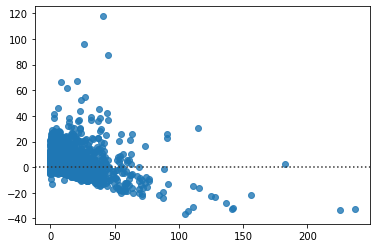

In [197]:
sb.residplot(y_test, y_pred, label="Residual plot for Rain data in Australia")

**This graph visualizes the predicted and the actual values that are calculated by the model trained above. The graph of predicted and actual values matches pretty well and hence we can infer that the accuracy of model is good.**

Accuracy:  [80.00608399] %


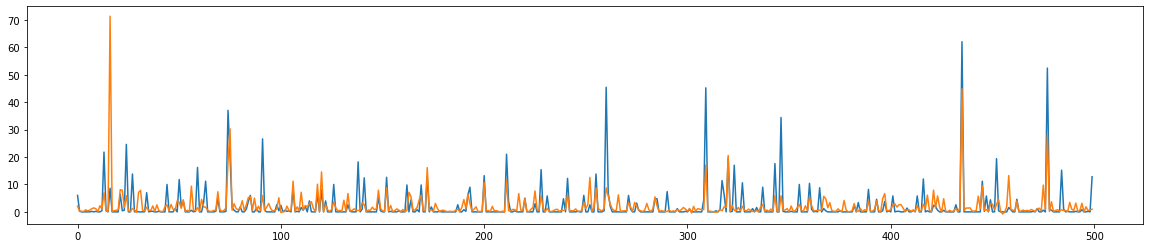

In [198]:
plt.figure(figsize = (20,4))
plt.plot(y_test[:500])
plt.plot(y_pred[:500])
print("Accuracy: ", 100 - np.abs(y_test - y_pred)[-1] * 100, "%")

**All the predicted values by model**

Text(0.5, 1.0, 'Predicted values by model')

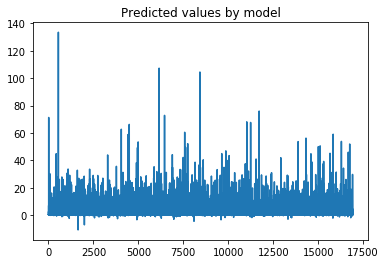

In [248]:
plt.plot(y_pred)
plt.title("Predicted values by model")

**The graph visualizes the predicted and actual values in scatter plot.**

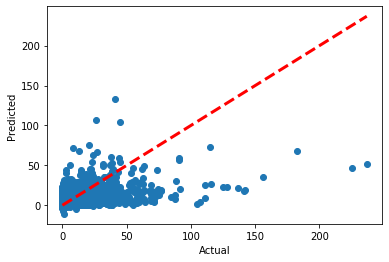

In [200]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

## III. Summary of Nonlinear Logistic Regression

The linear logistic regression that uses the softmax layer for classification along with a linear model. In nonlinear logistic regression extra layers are added called as hidden layers. With the inclusion of hidden layer the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output.

$$
V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$

<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W \\
G & = softmax(Y)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h Xl^\top \Big( (T - G) W^\top \odot (1 - m^2) \Big)\\
W &\leftarrow W + \alpha_o Zl^\top \Big(  T - G\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $T$ is a matrix with indicator variable outputs, <br/>
and $G$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

# Data

The data used here is same as the above data, except that the last column "RainTomorrow" is used for classification.

In [201]:
rwd2 = ReadWeatherData()
nlg_rain_df = rwd2.weatherData("weatherAUS_class.csv")

In [202]:
nlg_rain_df.shape

(56420, 24)

In [203]:
rain_df_temp = nlg_rain_df.dropna()
df1_temp = rain_df_temp.iloc[:,2:7]
df2_temp = rain_df_temp.iloc[:,8]
df3_temp = rain_df_temp.iloc[:,11:21]
df1_temp = df1_temp.join(df2_temp)
df1_temp = df1_temp.join(df3_temp)
nlg_rain_df_x = df1_temp
nlg_rain_df_target = rain_df_temp.iloc[:,23:24]

In [204]:
print(nlg_rain_df_x.shape, nlg_rain_df_target.shape)

(56420, 16) (56420, 1)


In [205]:
nlg_rain_df_target.loc[nlg_rain_df_target['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
nlg_rain_df_target.loc[nlg_rain_df_target['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1

In [206]:


class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
        
        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
            
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

## Training the Non-linear Logistic Regression on toy data

Text(0.5, 1.0, 'test data set')

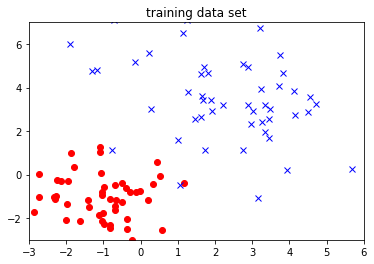

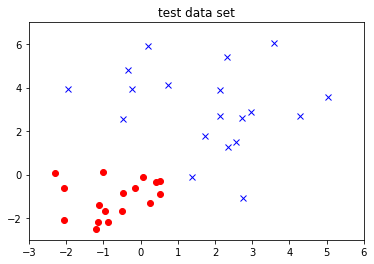

In [207]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")


In [238]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [239]:
classes

array([[0.08961329, 0.91038671],
       [0.09098182, 0.90901818],
       [0.08952648, 0.91047352],
       [0.08993174, 0.91006826],
       [0.08914438, 0.91085562],
       [0.0896148 , 0.9103852 ],
       [0.08961223, 0.91038777],
       [0.08961535, 0.91038465],
       [0.08961071, 0.91038929],
       [0.08975623, 0.91024377],
       [0.08961556, 0.91038444],
       [0.08961715, 0.91038285],
       [0.08944466, 0.91055534],
       [0.0896104 , 0.9103896 ],
       [0.08961167, 0.91038833],
       [0.0895825 , 0.9104175 ],
       [0.08952078, 0.91047922],
       [0.08961138, 0.91038862],
       [0.08961076, 0.91038924],
       [0.08961405, 0.91038595],
       [0.12885943, 0.87114057],
       [0.12885941, 0.87114059],
       [0.12885936, 0.87114064],
       [0.12531459, 0.87468541],
       [0.12885461, 0.87114539],
       [0.12885943, 0.87114057],
       [0.12881304, 0.87118696],
       [0.12807411, 0.87192589],
       [0.12790674, 0.87209326],
       [0.12884143, 0.87115857],
       [0.

In [240]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Examination of correct implementation (NonlinearLogReg) with toy data

I have sucessfully trained the toy data with non-linear logistic regression. I have used softmax as an activation function to train the neural network.<br>

The toy data is trained with 4 hidden layers. It achieves the accuracy of 50%. The accuracy is low because this generated dataset has less examples.

## Explanation of graphs
The above two graphs describes the two classes of data and their distribution. The given toy data is plotted along the X and Y Axis. <br>
The below graph shows the actual values with the predicted values. The accuracy of the model with toy data is 50%. 

Accuracy:  50.0 %


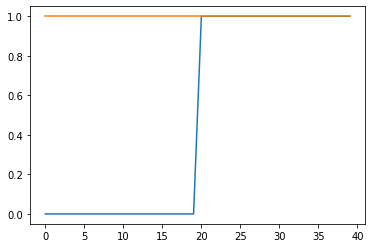

In [241]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

## Training  on rain data - Non-linear Logistic Regression 

In [213]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(np.array(nlg_rain_df_x), np.array(nlg_rain_df_target),test_size=0.20,random_state=42)


In [214]:
print(XTrain.shape, YTrain.shape)

(45136, 16) (45136, 1)


In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
sc=StandardScaler()

In [243]:
nn = NeuralNetLogReg([16,4,2])
nn.train(XTrain, YTrain, niter=1000) 
p,target = nn.use(XTest)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


## Explanation of code

The non-linear logistic regression is used to trian the model with **Softmax** function as an activation function. The softmax function ranges from 0 to 1 and hence classifies the data. We can use the different activation functions like sigmoid or tanh to train the neural network.

We use the **SCG** optimizer, which is imported from grad.py file given in class.

The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda.<br>

Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer.<br>

In [244]:
cm = confusion_matrix(YTest,target)
print("Confusion Matrix: \n", cm)

cr = classification_report(YTest,target)
print("\nClassification Report: \n", cr)

Confusion Matrix: 
 [[   0 8799]
 [   0 2485]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8799
           1       0.22      1.00      0.36      2485

    accuracy                           0.22     11284
   macro avg       0.11      0.50      0.18     11284
weighted avg       0.05      0.22      0.08     11284



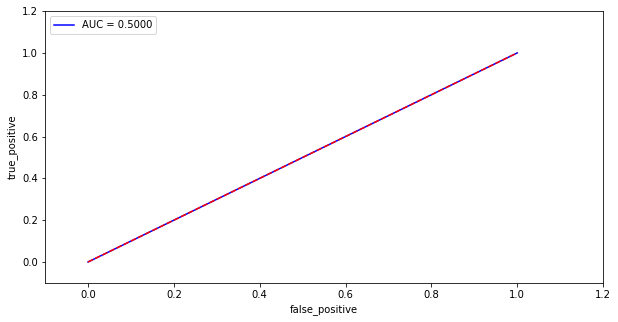

In [245]:
false_positive, true_positive, thresholds = roc_curve(YTest, target)
roc_auc = auc(false_positive, true_positive)
plt.figure(figsize = (10,5))
plt.plot(false_positive, true_positive, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('true_positive')
plt.xlabel('false_positive')
plt.show()


 Confusion Matrix: 
 [[   0 8799]
 [   0 2485]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8799
           1       0.22      1.00      0.36      2485

    accuracy                           0.22     11284
   macro avg       0.11      0.50      0.18     11284
weighted avg       0.05      0.22      0.08     11284



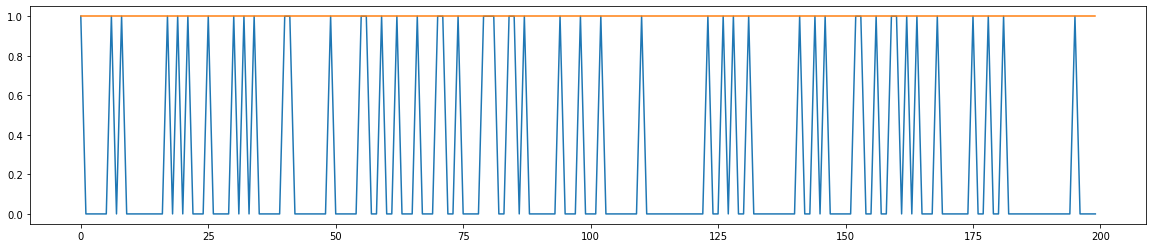

In [247]:
plt.figure(figsize = (20,4))
plt.plot(YTest[:200])
plt.plot(target[:200])
cm = confusion_matrix(YTest, target)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(YTest, target)
print("\n Classification Report: \n", cr)

## Cross validation for nonlinear logistic regression

In [220]:
def split_rain_df(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split_rain_df(X)
    partitionedT = split_rain_df(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

## Presentation of Cross Validation result - Non-linear logistic regression

In [221]:
models = [[16,5,2], [16,7,2],[16,9,2], [16,12,2]]
bestAccur, bestParam = (cross_validate(np.array(nlg_rain_df_x), np.array(nlg_rain_df_target), models))

test 0
val 0
val 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.8801111552203255, 0.0, 0.8801111552203255, 0.8801111552203255]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8801111552203255
[16, 5, 2]
val 2
[0.0, 0.0, 0.8582414246686229, 0.0]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8582414246686229
[16, 9, 2]
val 3
[0.8888779479099995, 0.0, 0.8888779479099995, 0.0]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8888779479099995
[16, 5, 2]
val 4


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


[0.8892060835753309, 0.0, 0.0, 0.0]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8892060835753309
[16, 5, 2]
history_rmse [0.8801111552203255, 0.8582414246686229, 0.8888779479099995, 0.8892060835753309]
params [[16, 5, 2], [16, 9, 2], [16, 5, 2], [16, 5, 2]]
[0.8801111552203255, 0.8582414246686229, 0.8888779479099995, 0.8892060835753309]
[[16, 5, 2], [16, 9, 2], [16, 5, 2], [16, 5, 2]]
[16, 5, 2]
test 1
val 0
[0.8640459052700458, 0.8640459052700458, 0.28295691970948167, 0.0009194345477531317]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8640459052700458
[16, 5, 2]
val 1
val 2
[0.8582414246686229, 0.8582414246686229, 0.0, 0.8582414246686229]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8582414246686229
[16, 5, 2]
val 3
[0.0, 0.0, 0.0, 0.0]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.0
[16, 5, 2]
val 4
[0.0, 0.8892060835753309, 0.0, 0.0]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8892060835753309
[16, 7, 2]
history_rmse [0.8640459052700458, 0.8582414

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0.0, 0.0, 0.0, 0.8892060835753309]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8892060835753309
[16, 12, 2]
history_rmse [0.864206233321585, 0.8801111552203255, 0.8888779479099995, 0.8892060835753309]
params [[16, 7, 2], [16, 12, 2], [16, 9, 2], [16, 12, 2]]
[0.864206233321585, 0.8801111552203255, 0.8888779479099995, 0.8892060835753309]
[[16, 7, 2], [16, 12, 2], [16, 9, 2], [16, 12, 2]]
[16, 12, 2]
test 3
val 0
[0.8640459052700458, 0.5524684910521551, 0.8640459052700458, 0.8640459052700458]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8640459052700458
[16, 5, 2]
val 1
[0.0, 0.8801111552203255, 0.0, 0.8801111552203255]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8801111552203255
[16, 7, 2]
val 2
[0.8582414246686229, 0.8582414246686229, 0.0, 0.0]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.8582414246686229
[16, 5, 2]
val 3
val 4
[0.0, 0.0, 0.8892060835753309, 0.9022188217291508]
[[16, 5, 2], [16, 7, 2], [16, 9, 2], [16, 12, 2]]
0.9022188217291508
[16, 12, 

In [232]:
nn = NeuralNetLogReg([16,5,2])
nn.train(XTrain, YTrain, niter=2000) 
p,target = nn.use(XTest)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


# IV - Results and plots 



In [223]:
cm = confusion_matrix(YTest,target)
print("Confusion Matrix: \n", cm)

cr = classification_report(YTest,target)
print("\nClassification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(YTest - target)) * 100, "%")

Confusion Matrix: 
 [[8799    0]
 [2485    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      8799
           1       0.00      0.00      0.00      2485

    accuracy                           0.78     11284
   macro avg       0.39      0.50      0.44     11284
weighted avg       0.61      0.78      0.68     11284

Testing Accuracy:  77.97766749379653 %


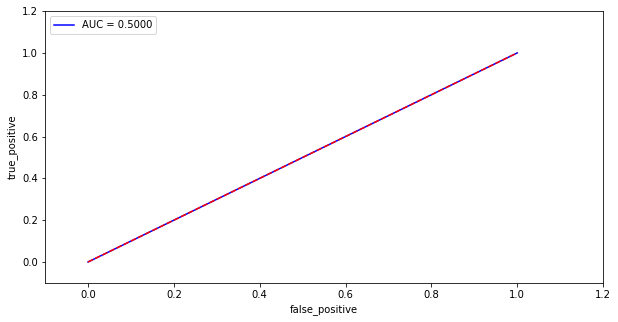

In [224]:
false_positive, true_positive, thresholds = roc_curve(YTest, target)
roc_auc = auc(false_positive, true_positive)
plt.figure(figsize = (10,5))
plt.plot(false_positive, true_positive, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('true_positive')
plt.xlabel('false_positive')
plt.show()


 Confusion Matrix: 
 [[8799    0]
 [2485    0]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      8799
           1       0.00      0.00      0.00      2485

    accuracy                           0.78     11284
   macro avg       0.39      0.50      0.44     11284
weighted avg       0.61      0.78      0.68     11284

Testing Accuracy:  77.97766749379653 %


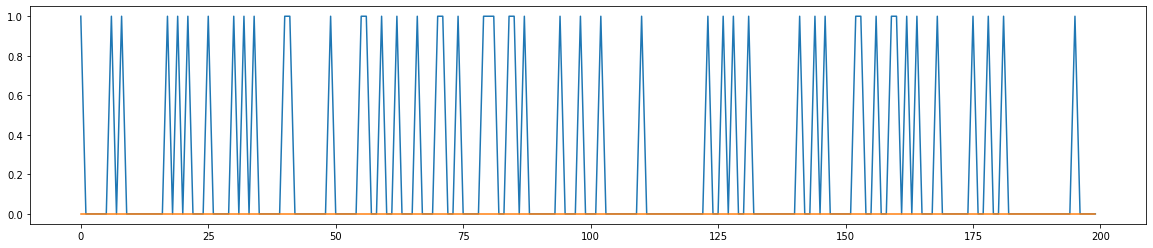

In [225]:
plt.figure(figsize = (20,4))
plt.plot(YTest[:200])
plt.plot(target[:200])
cm = confusion_matrix(YTest, target)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(YTest, target)
print("\n Classification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(YTest - target)) * 100, "%")

## Discussions about parameter/network structure choice

In the assignment I built 5 layered neural network. Input layer has 16 nodes because there are 16 features in my data that are actually useful. Output layer has 2 node specifying two classes namely (RainTomorrow - "Yes", "No")


The best network structure can be found by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[16, 5, 2], [16, 5, 2], [16, 9, 2], [16, 12, 2]]. Here first value represents input nodes, second value represents number of nodes in hidden layer, third value represents output nodes.

From the results of cross validation we can see that model [16, 5 ,2] has appeared more number of times. Hence the best model is the model with 16 nodes as input nodes, 5 hidden layers and 2 output layers because the rmse error for this is less.

The model with number of nodes in hidden layer 5 works better. With increasing layer the model keeps on improving With more number of nodes in hidden layer network its overfitting the data.

Hence, I've used [16, 5 ,2] as the final structure and I got Accuracy: 78%

## Discussion about the prediction results
In this assignment I have performed nonlinear logistic regression using Neural network which is nonlinear regression problem. On training the model using NeuralNetLogReg with optimum structure [16, 5 ,2], model has produced Accuracy of around 78%.

We are free to choose hidden layers, activation functions that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used softmax as activation function at last layer. The gradient is updating the weights in each layer during back propagation that makes the model to perform better.

I tried to train the model with 4 layers the accuracy was 78%. After increasing the layer by 1, the accuracy remained the same. This means that adding more layers to the model will not always increase the accuracy, since it may overfit the data. Finally I chose 5 layers for my model. The model learned the best features to be selected from the data.

# Conclusions

In this Assignment I learned various concepts in Neural networks. I learned how the complex problems can be solved by using the hidden layers and sending the outputs of one layer to the next layer. By using the algorithm given in class to perform k fold classification, I am able to implement it without using the libraries. Learing about k fold cross validation gives the knowledge of what is the best model for a particular dataset. For e.g. the number of layers in the model, number of output layers, etc. Also, sometimes increasing number of layers may not always improve the model since there is a case where it may overfit the data.

To understand the working and implementation of k fold cross validation was a challenging as well as interesting part.

# Extra Credit




## Loading the data again

In [266]:
rwd3 = ReadWeatherData()
tanh_rain_df = rwd3.weatherData("weatherAUS_class.csv")

In [267]:
rain_df_temp1 = tanh_rain_df.dropna()
df1_temp1 = rain_df_temp1.iloc[:,2:7]
df2_temp1 = rain_df_temp1.iloc[:,8]
df3_temp1 = rain_df_temp1.iloc[:,11:21]
df1_temp1 = df1_temp1.join(df2_temp1)
df1_temp1 = df1_temp1.join(df3_temp1)
rain_df_temp_x = df1_temp1
tanh_rain_df_target = rain_df_temp1.iloc[:,23:24]


In [268]:
tanh_rain_df_target.loc[tanh_rain_df_target['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
tanh_rain_df_target.loc[tanh_rain_df_target['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1

**Since the data is same, I have implemented the cross validation only once and passed the same model configuration to each activation function that is Sigmoid, tanh and ReLu.**

## Tanh

In [250]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [251]:
def split_rain_df(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split_rain_df(X)
    partitionedT = split_rain_df(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

In [270]:
models = [[16,3,1],[16,5,1],[16,7,1], [16,10,1], [16,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(rain_df_temp_x), np.array(tanh_rain_df_target), models)

test 0
val 0
val 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
val 2
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
val 3
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
val 4
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
history_rmse [0.0, 0.0, 0.0, 0.0]
params [[16, 3, 1], [16, 3, 1], [16, 3, 1], [16, 3, 1]]
[0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 3, 1], [16, 3, 1], [16, 3, 1]]
[16, 3, 1]
test 1
val 0
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
val 1
val 2
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
val 3
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5, 1], [16, 7, 1], [16, 10, 1], [16, 12, 1]]
0.0
[16, 3, 1]
val 4
[0.0, 0.0, 0.0, 0.0, 0.0]
[[16, 3, 1], [16, 5,

In [272]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(rain_df_temp_x),np.array(tanh_rain_df_target),test_size=0.30,random_state=40)

In [273]:
model=NeuralNet([16,3,1])  

model.train(X_train,y_train,niter=1000)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-2.61439577, -0.69028362, -3.01140172,  0.46581627, -0.3587454 ,
        -0.34959044,  0.80847128, -0.17020696, -0.03642974,  0.01842952,
         0.051707  , -6.01476628,  0.07356875,  0.04126497,  0.09505716,
        -0.03578639, -0.2376751 ,  0.12772169,  0.18445557,  0.47692398,
         0.21190189, -0.14804346, -0.05352951, -0.06818105, -0.18351364,
        -0.07625264,  0.19119379, -1.20671203,  0.28164925,  0.4670469 ,
         2.17693637,  0.40009615,  0.12981777,  0.6071842 ,  0.66631956,
         0.50244822, -0.58715679, -0.83169742, -0.28495039, -0.16984127,
         0.03929889,  0.18287093,  0.27842417,  0.12226693,  0.06377065,
        -0.68576773,  0.4491301 ,  0.58629953, -0.76982233,  0.09789098,
        -0.18994903,  0.17952214,  0.35464689,  0.98793107, -0.63644553]),
 'f': 0.2972243595682991,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [274]:
y_pred=model.use(X_test)

In [275]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 0.31941560920883777
R squared value: 0.401185064092905


## ReLU

In [ ]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [276]:
model=NeuralNet([16,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-7.86876323e-01,  2.03432351e+00, -2.13185237e-01, -3.62511643e-01,
        -1.80551441e-01,  1.92919622e-01, -2.46792202e-01, -3.88227489e-01,
         9.63298226e-02,  1.12039929e-02, -1.14484270e-01, -6.16730484e+00,
         3.94571689e-02, -4.95321514e-03,  4.12418945e-02, -3.82040939e-01,
        -2.29195235e-02,  6.70147921e-01,  5.61622046e-01, -3.29242872e-01,
        -5.38183277e-01, -2.33668818e-02,  1.59656274e-01,  1.66573176e-01,
        -1.65485059e-01,  1.06099235e-01,  3.01289622e-01,  3.79253548e-01,
         4.71588609e-01,  8.70119584e-01,  2.87562380e-01, -1.52496221e+00,
        -1.60721475e+00,  7.69387094e-01,  8.10050358e-02, -3.22198920e+00,
        -1.02559879e+00, -8.67190878e-03,  3.86557317e+00,  5.56421246e-02,
         4.87139839e-02,  6.32959233e-01,  8.49947065e-02, -9.68787187e-02,
        -8.45178135e-01,  6.48600205e-01,  5.29901588e-02,  1.30993288e+00,
        -1.68511306e-02,  6.49681314e-01, -1.76240620e+00,  6.88356571e-01,
       

In [277]:
y_pred=model.use(X_test)

from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 0.31953225969995874
R squared value: 0.4007476101343279


## Sigmoid

In [278]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [279]:
model=NeuralNet([16,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-4.20620937e-02,  1.65536966e-02,  8.51710119e-02,  1.43645816e-01,
        -1.07365002e-01,  1.52548730e-01,  2.43761041e-02,  2.24265042e-01,
        -1.69775580e-01, -5.60896926e-01,  7.58702859e-01, -5.83310677e-01,
         4.92651860e-02,  1.62168066e-01,  7.52164649e-02,  5.97960513e-01,
        -7.01634056e-01,  8.16605313e-01, -5.45366068e-01,  7.36932092e-01,
        -8.18629424e-01,  7.28460256e-04, -2.54561635e-02,  1.33426408e-02,
         1.90450932e-01, -4.98559873e-01,  2.86811638e-01, -7.03662617e-02,
        -5.86113211e-02, -8.97418801e-02, -6.56337847e-01,  9.24368348e-01,
        -1.03449923e+00,  1.15570895e-01,  6.05153832e-03,  1.98441975e-01,
         3.50971781e-01, -4.86879622e-01,  3.72650495e-01,  4.27132812e-02,
        -4.52290053e-01,  1.47994774e-01, -2.09220464e-01,  2.25440161e-02,
        -2.67683669e-01, -8.82392839e-02,  5.42270881e-02, -8.13044215e-02,
         4.50060237e-02, -6.47051217e-02,  7.05524832e-03,  2.21907717e-01,
       

In [280]:
y_pred=model.use(X_test)

from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 0.3380943423947726
R squared value: 0.3291025206789575


### Extra credit conclusion

The neural network is trained using three different activation functions (Sigmoid, ReLu and tanh). Each gave the different rmse error. Since the model configuration is kept same, we can easily compare the three different models.

# References

1. "Cross-Validation (Statistics)". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29#cite_note-4

2. Lecture Notes: https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb

3. Lecture Notes: https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.ipynb

4. Lecture Notes: https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ML%20Methodology.ipynb

# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
